In [1]:
from datasets import load_dataset
ds = load_dataset("GEM/web_nlg", "en", trust_remote_code=True)

Generating train split:   0%|          | 0/35426 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1667 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1779 [00:00<?, ? examples/s]

Generating challenge_train_sample split:   0%|          | 0/502 [00:00<?, ? examples/s]

Generating challenge_validation_sample split:   0%|          | 0/499 [00:00<?, ? examples/s]

Generating challenge_test_scramble split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating challenge_test_numbers split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Example
example = ds["train"][10]["input"]
example

['Aarhus_Airport | operatingOrganisation | Aktieselskab']

In [4]:
import pandas as pd

def show_example(example):
    print("Reference:", example["target"])
    print("Category:", example["category"])
    print("WebNLG ID:", example["webnlg_id"])

    triples = example["input"]

    # handle both list-of-strings and list-of-lists
    if isinstance(triples[0], str):
        triples = [t.split(" | ") for t in triples]

    df = pd.DataFrame(triples, columns=["subject", "predicate", "object"])
    display(df)

# Try it
show_example(ds["train"][59])


Reference: The runway name of Abilene Regional Airport is 17R/35L.
Category: Airport
WebNLG ID: train/Airport/1/Id25


,subject,predicate,object
0,Abilene_Regional_Airport,runwayName,"""17R/35L"""


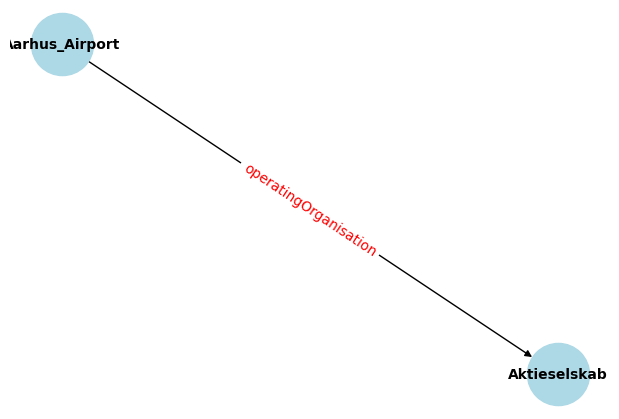

In [6]:
# Parse triples
edges = [tuple(t.split(" | ")) for t in example]
# Build graph
G = nx.DiGraph()
for s, r, o in edges:
    G.add_edge(s, o, label=r)

# Draw
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d["label"] for u,v,d in G.edges(data=True)}, font_color="red")
plt.show()

In [9]:
from pyvis.network import Network

# Set larger canvas size
net = Network(notebook=True, directed=True, height="850px", width="100%")

for u, v, d in G.edges(data=True):
    net.add_node(u, label=str(u))
    net.add_node(v, label=str(v))
    net.add_edge(u, v, label=d["label"])

net.show("knowledge_graph.html")

knowledge_graph.html
